### What is this notebook trying to answer?
1. **Is perp "basis" predictable?** Funding rate is treated as a proxy for basis (premium/discount vs spot). If funding is persistent ("sticky"), basis is persistent.
1. **If it’s predictable, can you harvest it with a simple strategy?** Strategy = long spot + short perp for the coins where you expect positive funding (i.e., shorts receive funding), rotated daily into the strongest candidates.
1. **What part of PnL drives the returns?** They decompose PnL into: spot/perp price moves (basis change), funding earned, trading costs

### Load perpetual funding rate history

In [6]:
# Imports & Parameters
import requests
import pandas as pd
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Parameters
BASE_URL = "https://fapi.binance.com"

# Date range for data
START_DATE = '2025-04-01'
END_DATE = '2026-01-02'

In [7]:
# Fetch funding rate data & create DataFrame
params = {
    "symbol": "BTCUSDT",
    "startTime": int(datetime.strptime(START_DATE, '%Y-%m-%d').timestamp() * 1000),
    "endTime": int(datetime.strptime(END_DATE, '%Y-%m-%d').timestamp() * 1000),
    "limit": 1000
}

response = requests.get(f"{BASE_URL}/fapi/v1/fundingRate", params=params)
funding_data = response.json()

# Create DataFrame
df = pd.DataFrame(funding_data)
df['fundingTime'] = pd.to_datetime(df['fundingTime'], unit='ms')
df['fundingRate'] = df['fundingRate'].astype(float)

# Resample to daily average funding rate
df_daily = df.set_index('fundingTime').resample('D')['fundingRate'].mean().reset_index()

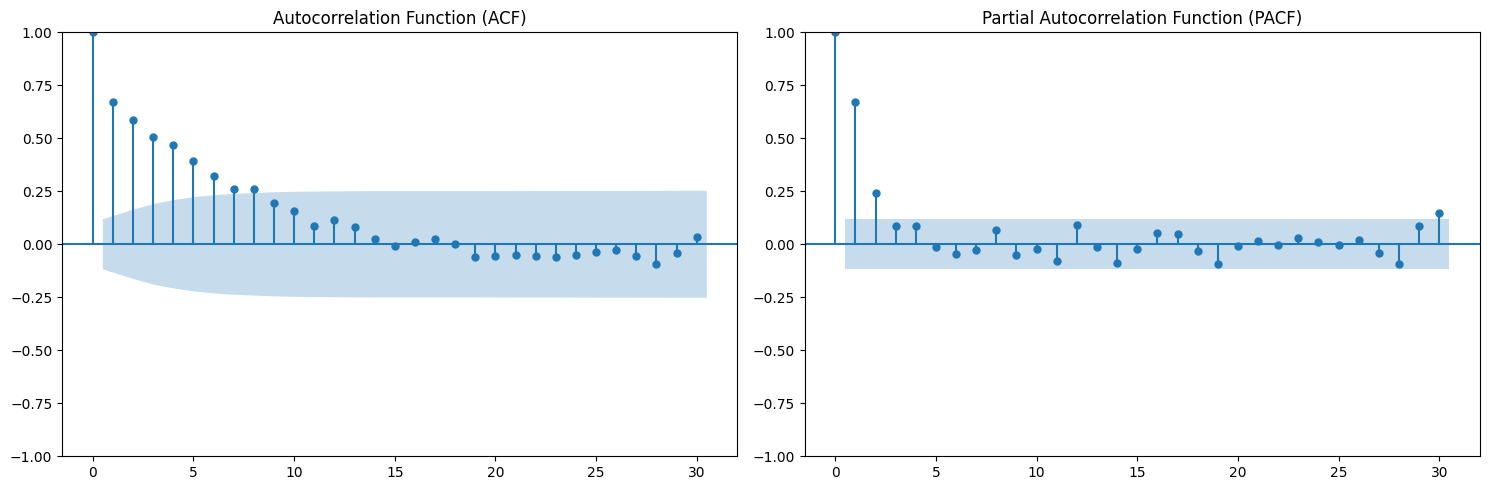

In [8]:


# Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(df_daily['fundingRate'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(df_daily['fundingRate'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()